<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/02_Neural_network_classification_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 **02. Neural network classification with TensorFlow Exercises**

1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*
3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.
7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.


---

---

## **0. Import the TensorFlow**

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

---

---

## **1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?**

---

---

## **2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.**

---

---

## **3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.**


### **Data Preprocessing**

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.03, random_state=8)

In [ ]:
X = pd.DataFrame(X, columns=['X0', 'X1'])
X.head()

,X0,X1
0,1.831728,-0.000631
1,-0.069368,1.017884
2,0.296687,-0.224581
3,-0.496681,0.909355
4,-0.007274,1.012325


In [ ]:
X.head()

,X0,X1
0,1.831728,-0.000631
1,-0.069368,1.017884
2,0.296687,-0.224581
3,-0.496681,0.909355
4,-0.007274,1.012325


In [ ]:
y[:10]

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
df = X.copy()
df['y'] = y

df.head()

,X0,X1,y
0,1.831728,-0.000631,1
1,-0.069368,1.017884,0
2,0.296687,-0.224581,1
3,-0.496681,0.909355,0
4,-0.007274,1.012325,0


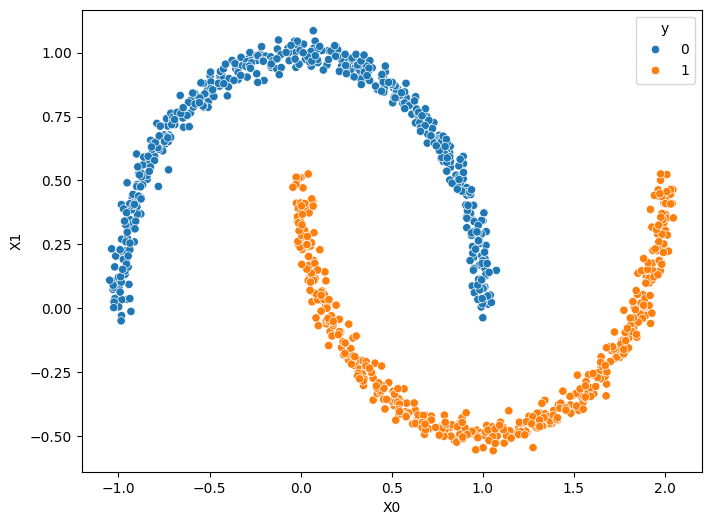

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='X0', y='X1', hue='y');

### **Preparing Model - 1**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 2.2423 - accuracy: 0.7100
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 2.0666 - accuracy: 0.7250
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 1.8941 - accuracy: 0.7412
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 1.7493 - accuracy: 0.7563
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 1.5906 - accuracy: 0.7638
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 1.4922 - accuracy: 0.7750
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 1.4093 - accuracy: 0.7812
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 1.3807 - accuracy: 0.7862
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 1.3127 - accuracy: 0.7912
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 1.2495 - accuracy: 0.7962
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.7391 - accuracy: 0.8700


[0.7390565276145935, 0.8700000047683716]

### Preparing Model - 2

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 1.8680 - accuracy: 0.4963
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 1.7614 - accuracy: 0.5275
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 1.6854 - accuracy: 0.6000
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 1.6317 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 1.5816 - accuracy: 0.6750
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 1.4941 - accuracy: 0.7075
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 1.3883 - accuracy: 0.7300
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 1.3434 - accuracy: 0.7425
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 1.3150 - accuracy: 0.7538
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 1.2804 - accuracy: 0.7650
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.8750


[0.670250415802002, 0.875]

### **Preparing Model - 3**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 8ms/step - loss: 1.3032 - accuracy: 0.7962
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 1.2063 - accuracy: 0.7987
Epoch 3/20
25/25 [==============================] - 0s 15ms/step - loss: 1.1767 - accuracy: 0.7975
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 1.1693 - accuracy: 0.7975
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 1.1633 - accuracy: 0.8025
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 1.1573 - accuracy: 0.8062
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 1.1517 - accuracy: 0.8062
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 1.1220 - accuracy: 0.8138
Epoch 9/20
25/25 [==============================] - 0s 7ms/step - loss: 1.0680 - accuracy: 0.8138
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 1.0355 - accuracy: 0.8163
Epoch 11/20
25/25

In [ ]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 1s 6ms/step - loss: 0.2891 - accuracy: 0.8500


[0.28911292552948, 0.8500000238418579]

### **Preparing Model - 4**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_4.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7108 - accuracy: 0.6325
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.6463
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.6675
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.6938
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7113
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7250
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7362
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7462
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7538
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.7650
Epoch 11/20
25/25 [

### **Preparing Model - 5**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_5.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6746 - accuracy: 0.7525
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7188
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7250
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7375
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7387
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.7475
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.7525
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.7588
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.7700
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.7763
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9200


[0.17349687218666077, 0.9200000166893005]

### **Final model (Model - 6)**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_6.fit(X_train, y_train, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.5753 - accuracy: 0.6800
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8475
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8875
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9075
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9350
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9613
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9800
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9912
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9912
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000


In [ ]:
# Evaluate the model
model_6.fit(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 1.0000


In [ ]:
model_6.save('half_moon_best_model.keras')

In [ ]:
y_probs = model_6.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [ ]:
y_probs = y_probs.squeeze()

In [ ]:
y_probs[:10]

array([9.9042428e-01, 9.7220792e-03, 9.9733931e-01, 9.9672681e-01,
       9.9573463e-01, 9.4448817e-01, 9.9898088e-01, 3.4008987e-04,
       2.4359317e-03, 8.4142154e-03], dtype=float32)

In [ ]:
y_preds = tf.round(y_probs)
y_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)>

In [ ]:
y_preds = tf.cast(y_preds, dtype=tf.int32)
y_preds[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int32)>

In [ ]:
X_train['X0'].head()

578    1.871333
66     0.542964
39    -0.604803
302   -0.955895
974    0.034975
Name: X0, dtype: float64

In [ ]:
colors = sns.color_palette(n_colors=6)

def plot(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, prediction=None):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=X_train['X0'], y=X_train['X1'], hue=y_train, palette=colors[:2])
  sns.scatterplot(x=X_test['X0'], y=X_test['X1'], hue=y_test, palette=colors[2:4])
  sns.scatterplot(x=X_test['X0'], y=X_test['X1'], hue=y_preds, palette=colors[4:]);

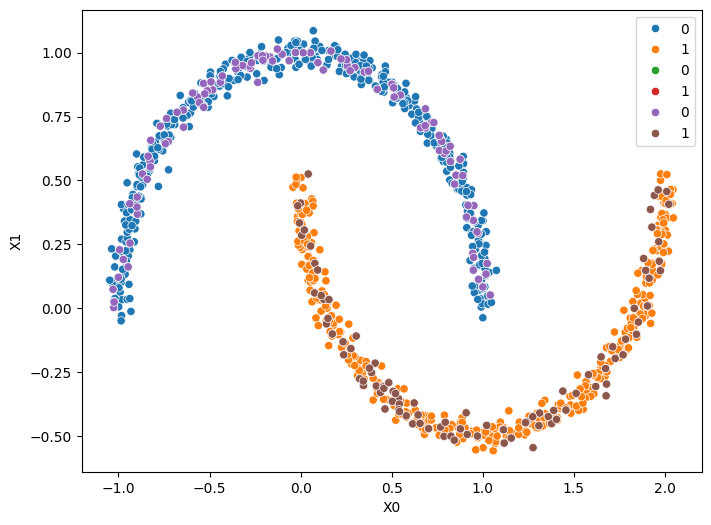

In [ ]:
plot(prediction=y_preds)

### **Finding Ideal Learning Rate (Model - 7)**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

# Set the Learning Rate
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs / 20))

# Fit on the model
lrs_history = model_7.fit(X_train,
                          y_train,
                          epochs=30,
                          callbacks=[learning_rate_scheduler],
                          validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 1s 12ms/step - loss: 0.6994 - accuracy: 0.5138 - val_loss: 0.6803 - val_accuracy: 0.5150 - lr: 0.0010
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6388 - val_loss: 0.6285 - val_accuracy: 0.7900 - lr: 0.0011
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6007 - accuracy: 0.7862 - val_loss: 0.5769 - val_accuracy: 0.8100 - lr: 0.0013
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.8025 - val_loss: 0.5139 - val_accuracy: 0.8550 - lr: 0.0014
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.8263 - val_loss: 0.4481 - val_accuracy: 0.8750 - lr: 0.0016
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8425 - val_loss: 0.3774 - val_accuracy: 0.8750 - lr: 0.0018
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.3674 - 

### **Plot the Learning Rate Vs Loss**

In [ ]:
lrs = 1e-3 * 10 ** (tf.range(30) / 20)
lrs

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383])>

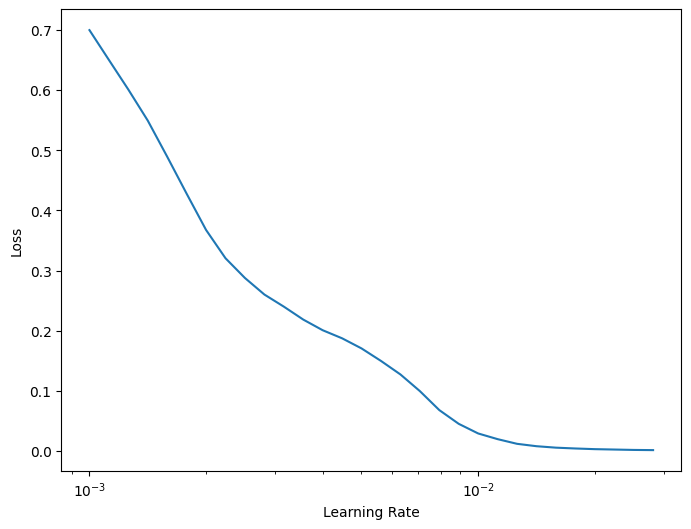

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogx(lrs, lrs_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss');

> It's Found that **'0.01'** is the best learning rate.👀😎😅

---

---

## **4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.**

### **Getting the data ready and Data Preprocessing**

In [ ]:
(X_train, y_train), (X_test, y_test)  = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train[0].shape

()

In [ ]:
doc = tf.keras.datasets.fashion_mnist.load_data.__doc__
doc

'Loads the Fashion-MNIST dataset.\n\n    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,\n    along with a test set of 10,000 images. This dataset can be used as\n    a drop-in replacement for MNIST.\n\n    The classes are:\n\n    | Label | Description |\n    |:-----:|-------------|\n    |   0   | T-shirt/top |\n    |   1   | Trouser     |\n    |   2   | Pullover    |\n    |   3   | Dress       |\n    |   4   | Coat        |\n    |   5   | Sandal      |\n    |   6   | Shirt       |\n    |   7   | Sneaker     |\n    |   8   | Bag         |\n    |   9   | Ankle boot  |\n\n    Returns:\n      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.\n\n    **x_train**: uint8 NumPy array of grayscale image data with shapes\n      `(60000, 28, 28)`, containing the training data.\n\n    **y_train**: uint8 NumPy array of labels (integers in range 0-9)\n      with shape `(60000,)` for the training data.\n\n    **x_test**: uint8 NumPy array of grayscale image d

In [ ]:
categories = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [ ]:
import random

In [ ]:
def fashion_view(number):
  image = X_train[number]
  label = y_train[number]
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title(categories[label])
  plt.axis(False)

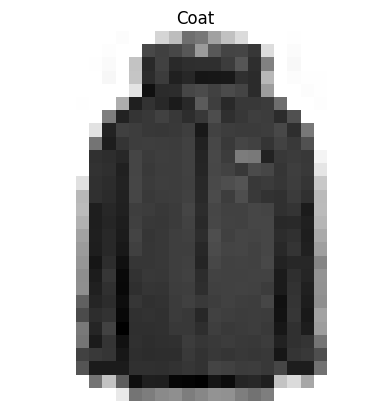

In [ ]:
fashion_view(random.randint(0, len(X_train) - 1))

---

---

## **5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.**

### **Preparing Model - 8**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_8.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_8.fit(X_train,
            y_train,
            epochs=20,
            validation_data=(X_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32,) and (32, 28, 10) are incompatible


### **Preparing Model - 9 (Flattening the Data)**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# Fit the model
model_9.fit(X_train,
            y_train,
            epochs=20,
            validation_data=(X_test, y_test))

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


### **Preparing Model - 10 (Changing loss function from CategoricalCrossentropy to SparseCategoricalCrossentropy because the labels aren't 'OneHotEncoded', labels are in type of Integers)**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_10.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 # 'SparseCategoricalCrossentropy' use because labels are integers,
                 # use 'CategoricalCrossentropy' if labels are in OneHotEncoded.
                 metrics=['accuracy'])

# Fit the model
model_10.fit(X_train,
             y_train,
             epochs=20,
             validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4567 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3031 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.0997 - val_loss: 2.2918 - val_accuracy: 0.1047
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2875 - accuracy: 0.1064 - val_loss: 2.2928 - val_accuracy: 0.1044
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2796 - accuracy: 0.1105 - val_loss: 2.2631 - val_accuracy: 0.1203
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2379 - accuracy: 0.1291 - val_loss: 2.0572 - val_accuracy:

### **Normalizing the data**

> Previous model (model - 10) provided the accuracy of `33.36%`

In [ ]:
X_train_max = X_train.max()
X_train_min = X_train.min()
X_test_max = X_test.max()
X_test_min = X_test.min()

print(f'Training data maximum: {X_train_max}')
print(f'Training data minimum: {X_train_min}')
print(f'Test data maximum: {X_test_max}')
print(f'Test data minimum: {X_test_min}')

Training data maximum: 255
Training data minimum: 0
Test data maximum: 255
Test data minimum: 0


In [ ]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [ ]:
X_train_norm_max = X_train_norm.max()
X_train_norm_min = X_train_norm.min()
X_test_norm_max = X_test_norm.max()
X_test_norm_min = X_test_norm.min()

print(f'Normalized training data maximum: {X_train_norm_max}')
print(f'Normalized training data minimum: {X_train_norm_min}')
print(f'Normalized test data maximum: {X_test_norm_max}')
print(f'Normalized test data minimum: {X_test_norm_min}')

Normalized training data maximum: 1.0
Normalized training data minimum: 0.0
Normalized test data maximum: 1.0
Normalized test data minimum: 0.0


### **Preparing Model - 11**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])

# Fit the model
model_11.fit(X_train,
             y_train,
             epochs=20,
             validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8719 - accuracy: 0.2293 - val_loss: 1.7157 - val_accuracy: 0.2532
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6649 - accuracy: 0.2811 - val_loss: 1.6454 - val_accuracy: 0.2863
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5853 - accuracy: 0.2998 - val_loss: 1.5518 - val_accuracy: 0.2984
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5237 - accuracy: 0.3299 - val_loss: 1.4881 - val_accuracy: 0.3713
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4778 - accuracy: 0.3680 - val_loss: 1.4751 - val_accuracy: 0.3744
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4231 - accuracy: 0.4048 - val_loss: 1.4201 - val_accuracy: 0.4045
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2680 - accuracy: 0.4931 - val_loss: 1.1515 - val_accuracy:

#### After `normalization` the results have been increased `2x` i.e., for `65.92%`

### Finding the `Ideal Learning Rate` (Model - 12)

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])

# Callbacks for the model
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs/20))

# Fit the model
lrs_norm_history = model_12.fit(X_train_norm,
                                y_train,
                                epochs=50,
                                validation_data=(X_test_norm, y_test),
                                callbacks=[learning_rate_scheduler])

Epoch 1/50
1875/1875 [==============================] - 15s 6ms/step - loss: 1.1025 - accuracy: 0.6162 - val_loss: 0.7392 - val_accuracy: 0.7414 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6627 - accuracy: 0.7735 - val_loss: 0.6345 - val_accuracy: 0.7793 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5891 - accuracy: 0.7980 - val_loss: 0.5971 - val_accuracy: 0.7905 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5559 - accuracy: 0.8071 - val_loss: 0.5707 - val_accuracy: 0.7984 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5386 - accuracy: 0.8131 - val_loss: 0.5574 - val_accuracy: 0.8072 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5309 - accuracy: 0.8153 - val_loss: 0.5675 - val_accuracy: 0.7982 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 6

### **Plotting the `Learning curve` Vs `Loss`**

In [ ]:
lrs = 1e-3 * 10 ** (tf.range(50) / 20)
lrs

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509,
       0.1       , 0.11220185, 0.12589254, 0.14125375, 0.15848932,
       0.17782794, 0.19952623, 0.22387211, 0.25118864, 0.28183829])>

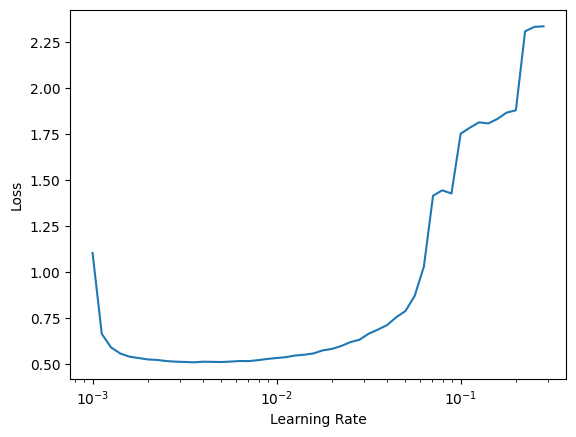

In [ ]:
plt.semilogx(lrs, lrs_norm_history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss');

In [ ]:
1e-3, 1e-2

(0.001, 0.01)

### **Applying best Learning Rate (i.e., default - 0.001 found to be the best learning rate) on the model and finilizing the model (Model - 13)**

In [ ]:
# Set the random seed
tf.random.set_seed(8)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])

# Fit the model
model_13.fit(X_train_norm,
             y_train,
             epochs=30,
             validation_data=(X_test_norm, y_test))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5740 - accuracy: 0.7983 - val_loss: 0.4546 - val_accuracy: 0.8391
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4148 - accuracy: 0.8508 - val_loss: 0.4374 - val_accuracy: 0.8457
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3796 - accuracy: 0.8608 - val_loss: 0.3937 - val_accuracy: 0.8555
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3567 - accuracy: 0.8698 - val_loss: 0.4005 - val_accuracy: 0.8561
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3431 - accuracy: 0.8746 - val_loss: 0.3816 - val_accuracy: 0.8648
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3333 - accuracy: 0.8777 - val_loss: 0.4231 - val_accuracy: 0.8432
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3235 - accuracy: 0.8809 - val_loss: 0.4049 - val_accuracy:

### **Saving the best model**

In [ ]:
model_13.save('fashion_model_91.keras')

### **Loading the saved model**

In [ ]:
fashion_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/fashion_model_91.keras')

### **Predicting the saved model**

In [ ]:
fashion_probs = fashion_model.predict(X_test_norm)
fashion_probs[0]

313/313 [==============================] - 1s 3ms/step


array([1.4951708e-07, 6.4073603e-05, 1.2350820e-07, 1.5461902e-08,
       4.4776560e-10, 9.5837102e-05, 3.6582357e-08, 2.2517093e-02,
       4.1177858e-10, 9.7732264e-01], dtype=float32)

In [ ]:
fashion_probs[0].argmax()

9

In [ ]:
fashion_probs.shape

(10000, 10)

In [ ]:
fashion_preds = fashion_probs.argmax(axis=1)
fashion_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### **Plotting the `Confusion Matrix`**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=fashion_preds)
cm

array([[839,   0,  10,  51,   3,   2,  83,   0,  12,   0],
       [  8, 953,   3,  27,   4,   0,   3,   0,   2,   0],
       [ 20,   0, 825,  18,  75,   0,  55,   0,   7,   0],
       [ 21,   2,  15, 922,  15,   0,  19,   0,   6,   0],
       [  0,   0, 136,  58, 756,   0,  45,   0,   5,   0],
       [  0,   0,   0,   1,   0, 961,   0,  18,   5,  15],
       [131,   1, 101,  40,  71,   0, 642,   0,  14,   0],
       [  0,   0,   0,   1,   0,  18,   0, 963,   6,  12],
       [  6,   0,   7,   6,   4,   4,   5,   3, 965,   0],
       [  0,   1,   0,   0,   0,  12,   1,  72,   1, 913]])

In [ ]:
category_array = np.array(list(categories.values()))
category_array

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

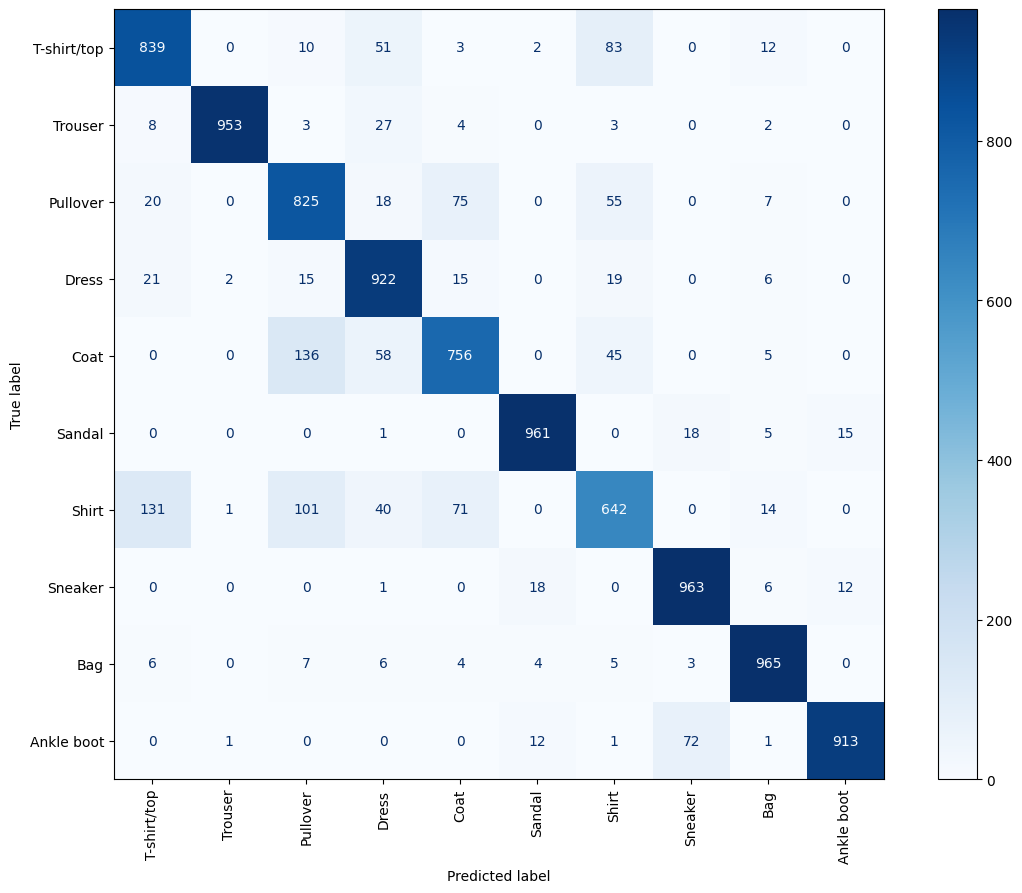

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=category_array)
fig, ax = plt.subplots(figsize=(14, 10))
disp.plot(xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax);

### **Classification Report of the saved model**

In [ ]:
class_report = classification_report(y_true=y_test, y_pred=fashion_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.75      0.82      0.79      1000
           3       0.82      0.92      0.87      1000
           4       0.81      0.76      0.78      1000
           5       0.96      0.96      0.96      1000
           6       0.75      0.64      0.69      1000
           7       0.91      0.96      0.94      1000
           8       0.94      0.96      0.95      1000
           9       0.97      0.91      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



---

---

## **6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.**

In [ ]:
import random

In [ ]:
def predict_plot(no_preds, nrows, ncols,
                   model=fashion_model, categories=categories, X_test=X_test_norm, y_test=y_test):
  if nrows * ncols != no_preds:
    print("Number of rows and columns didn't match with number of predictions")
  else:
    rands = [random.randint(0, len(X_test) - 1) for i in range(no_preds)]
    probs = [model.predict(X_test_norm[rand].reshape(1, 28, 28)) for rand in rands]
    preds = [prob.argmax() for prob in probs]
    fig, ax = plt.subplots(nrows, ncols, figsize=(8, 9))

    k = 0
    for i in range(nrows):
      for j in range(ncols):
        ax[i][j].imshow(X_test_norm[rands[k]], cmap=plt.cm.binary)

        predicted = categories[preds[k]]
        actual = categories[y_test[rands[k]]]

        if predicted == actual:
          color = 'Green'
        else:
          color = 'Red'

        ax[i][j].set_title(f'Image - {k + 1}')
        ax[i][j].set_xlabel(f'Predicted value: {predicted}\nActual value: {actual}', color=color)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

        k = k + 1

1/1 [==============================] - 0s 29ms/step


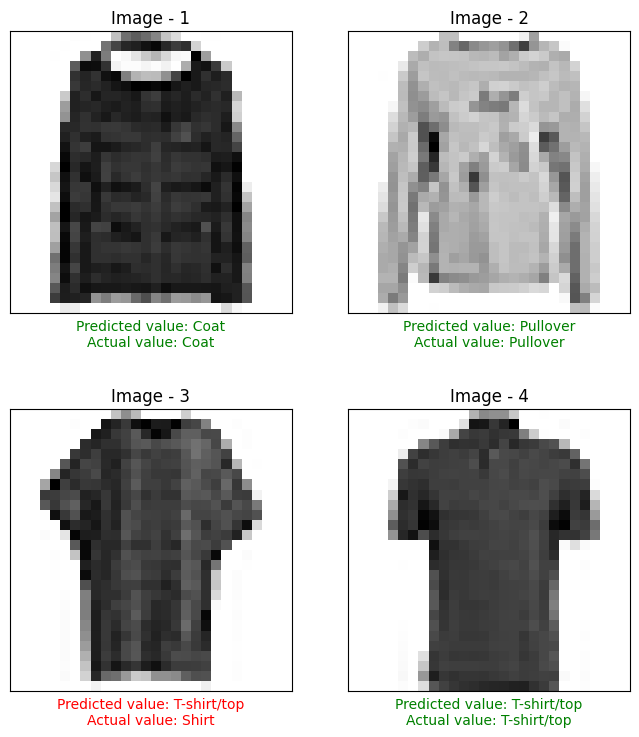

In [ ]:
predict_plot(4, 2, 2)

---

---

## **7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.**

In [ ]:
import random

In [46]:
def predict_class_plot(no_preds, nrows, ncols,
                       model=fashion_model, categories=categories, X_test=X_test_norm, y_test=y_test):
  if(no_preds != nrows * ncols):
    print("Number of rows and columns didn't match with number of predictions")
  else:
    rand_class = random.randint(0, 9)

    index = []
    while len(index) != no_preds:
      ind = random.randint(0, len(X_test) - 1)
      if y_test[ind] == rand_class:
        index.append(ind)

    actuals = [y_test[i] for i in index]
    probs = [model.predict(X_test_norm[i].reshape(1, 28, 28)) for i in index]
    preds = [prob.argmax() for prob in probs]

    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 8))

    k = 0
    for i in range(nrows):
      for j in range(ncols):
        if actuals[k] == preds[k]:
          color = 'Green'
        else:
          color = 'Red'

        ax[i][j].imshow(X_test_norm[index[k]], cmap=plt.cm.binary)
        ax[i][j].set_title(f'Image - {k + 1}')
        ax[i][j].set_xlabel(f'Predicted: {categories[preds[k]]} {probs[k].max() * 100:.2f}%\nActual: {categories[actuals[k]]}', color=color)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

        k = k + 1

1/1 [==============================] - 0s 24ms/step


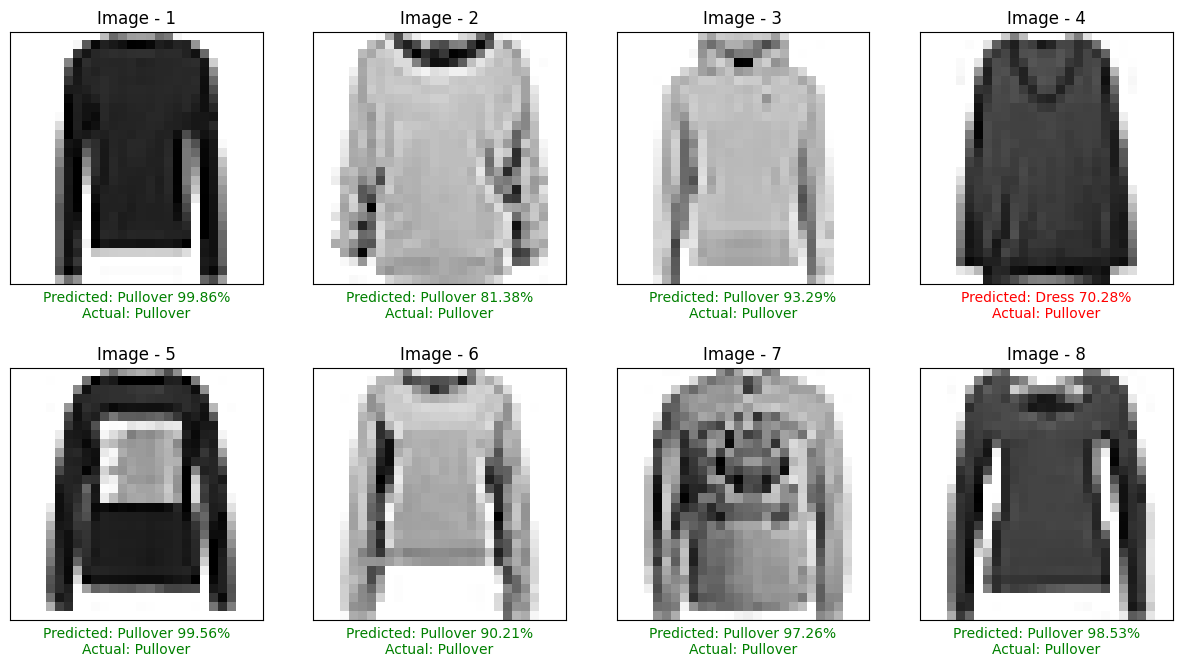

In [60]:
predict_class_plot(8, 2, 4)


# **📖 02. Neural network classification with TensorFlow Extra-curriculum**

* Watch 3Blue1Brown's neural networks video 2: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). After you're done, write 100 words about what you've learned.
  * If you haven't already, watch video 1: [*But what is a Neural Network?*](https://www.youtube.com/watch?v=aircAruvnKk). Note the activation function they talk about at the end.
* Watch [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (if you haven't already) to get an idea of the concepts behind using linear and non-linear functions.
* Spend 1-hour reading [Michael Nielsen's Neural Networks and Deep Learning book](http://neuralnetworksanddeeplearning.com/index.html).
* Read the [ML-Glossary documentation on activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Which one is your favourite?
  * After you've read the ML-Glossary, see which activation functions are available in TensorFlow by searching "tensorflow activation functions".
